In [2]:
#This Notebook is ONLY for understanding data & making decisions “What do I need to do later, and why?”
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [3]:
df = pd.read_csv("../data/raw/train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
target = "SalePrice"   # change if column name differs
df[target].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

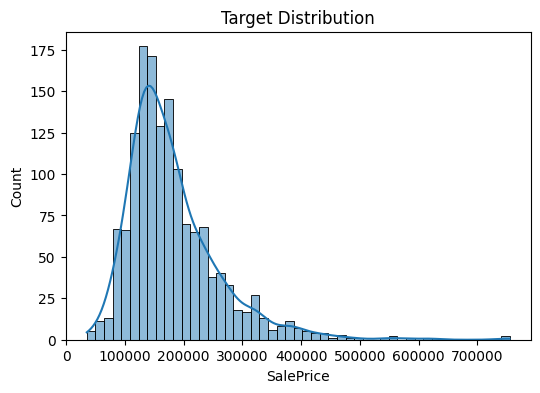

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df[target], kde=True)
plt.title("Target Distribution")
plt.show()


Q1:From the plot: Is the target skewed?
Yes — strongly right-skewed (positively skewed).
How we know (from the picture):
Peak around $120k–$180k
Long tail stretching to $700k+
Mean > median (you already saw this in describe())
This is classic House Prices behavior.

Q2:Would log-transform be useful later?
Yes — very useful and commonly done.
Why log-transform SalePrice?
Makes distribution more symmetric
Reduces impact of extreme luxury houses
Helps linear models (LinearRegression, Ridge, Lasso)
Improves RMSE stability
When to apply?
 After train-test split, on the target only

In [7]:
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

Q1Missing values: Which columns need imputation?
Let’s categorize by meaning, not just percentage.
Columns to DROP (too sparse, low signal)
So Columns are:
PoolQC
MiscFeature
Alley
Fence
drop_cols = ["PoolQC", "MiscFeature", "Alley", "Fence"]


Columns to IMPUTE AS "None"
Missing means feature does not exist, not unknown.
Columns:
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
MasVnrType
df[cols] = df[cols].fillna("None")


Numeric columns to IMPUTE WITH MEDIAN
Columns:
LotFrontage
MasVnrArea
GarageYrBlt
 Median is safer than mean (outliers exist)
df[col] = df[col].fillna(df[col].median())

Very small missing → Mode
Column:
Electrical
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

In [8]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Important categorical columns (pick 3–4)
Based on domain importance + predictive power:
High-impact categorical features:
Neighborhood (Strongly correlated with price Location effect)
ExterQual (Overall exterior quality Ordinal meaning)
KitchenQual (Direct quality signal)
GarageType (Presence + type matters)

High-cardinality categorical columns
From nunique() (typical for this dataset):
Neighborhood
Exterior1st
Exterior2nd	
Condition1
Condition2

Encoding strategy (later stage)
 Low cardinality (≤10 unique)
OneHotEncoder
MSZoning, LotShape, LandSlope, SaleCondition, SaleType
 Ordinal categories (order matters)

Ordinal encoding (manual mapping)
ExterQual, KitchenQual, HeatingQC, BsmtQual, GarageQual
Example:
{"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "None":0}

High cardinality
Options:
OneHot (safe for tree models)
Target encoding (later, with CV)
Drop if weak (e.g. Condition2)

In [9]:
df[cat_cols].nunique().sort_values(ascending=False)


Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Heating           6
Foundation        6
GarageType        6
ExterCond         5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
BldgType          5
FireplaceQu       5
LandContour       4
LotShape          4
KitchenQual       4
MiscFeature       4
Fence             4
BsmtCond          4
ExterQual         4
BsmtExposure      4
BsmtQual          4
LandSlope         3
PoolQC            3
GarageFinish      3
PavedDrive        3
MasVnrType        3
Utilities         2
Alley             2
Street            2
CentralAir        2
dtype: int64

In [10]:
num_cols = df.select_dtypes(exclude="object").columns
num_cols


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

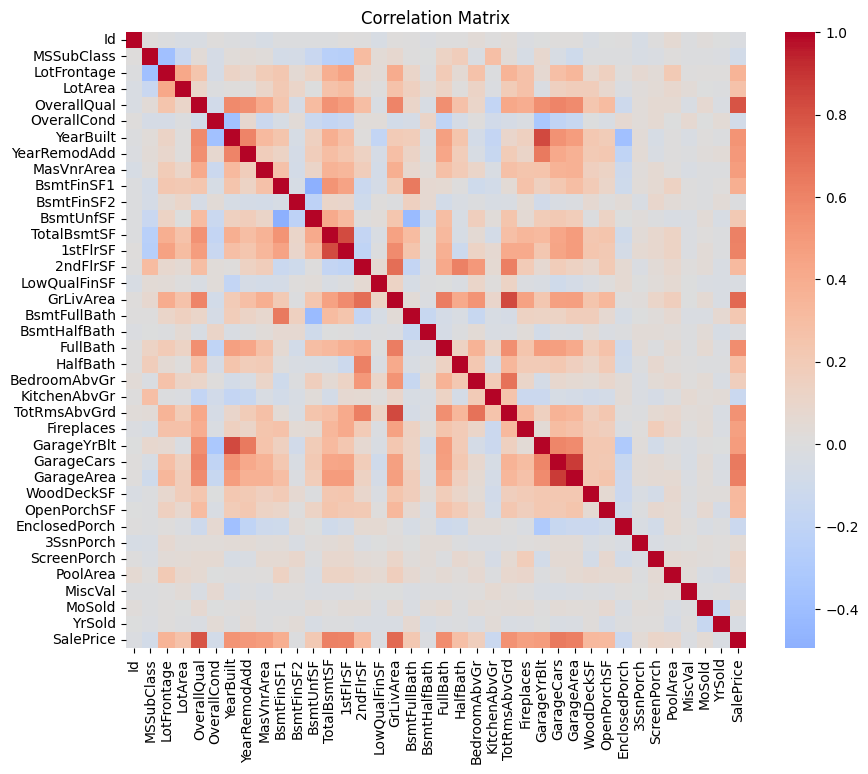

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()


Any strong correlations?
 YES — very clear ones
We care about correlation with SalePrice and between predictors.
Strong correlation with SalePrice (≈ ≥ 0.6)
From the heatmap (last column / row):
Top predictors:
Feature:
OverallQual	(Strongest signal (quality → price))
GrLivArea	(Bigger house → higher price)
TotalBsmtSF	(Basement size matters)
1stFlrSF	(Strong size proxy)
GarageCars	(Capacity more important than area)
GarageArea	(Redundant with GarageCars)
YearBuilt	(Newer houses cost more)
YearRemodAdd	(Renovation boosts price)
These will dominate linear models.

 Moderate correlations (≈ 0.3–0.6)
Feature:
Fireplaces
FullBath
TotRmsAbvGrd
MasVnrArea
LotFrontage
Useful, but not dominant.

Weak / near-zero with SalePrice
Features:
MoSold, YrSold	(Sale timing ≠ value)
PoolArea	(Too sparse)
MiscVal	(Mostly zeros)
3SsnPorch	(Rare)
LowQualFinSF	(Rare)
Id	(Pure noise)

Why this matters (model-wise)
Linear / Ridge / Lasso (Coefficients become unstable Signs may flip Interpretation becomes unreliable)
Tree models (RF / XGBoost) (Not a problem Trees naturally pick one feature)

🛠 What should YOU do?
Step 1️⃣ Remove obvious redundancies (baseline)
Drop one feature from each pair:
GarageArea (keep GarageCars)
BsmtFinSF1, BsmtUnfSF (keep TotalBsmtSF)
GarageYrBlt (keep YearBuilt)
TotRmsAbvGrd (optional)
1stFlrSF (keep GrLivArea)
Step 2️⃣ Drop pure noise
Id
MoSold
YrSold
MiscVal
Step 3️⃣ Regularization (important)
Use Ridge instead of plain Linear Regression:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
This controls multicollinearity without manual dropping.


Q1 Answer:
✔ Yes — OverallQual, GrLivArea, TotalBsmtSF are strongest
✔ Size + quality dominate price

Q2 Answer:
❗ Yes — serious multicollinearity exists
✔ Safe for trees
⚠ Risky for linear models without handling

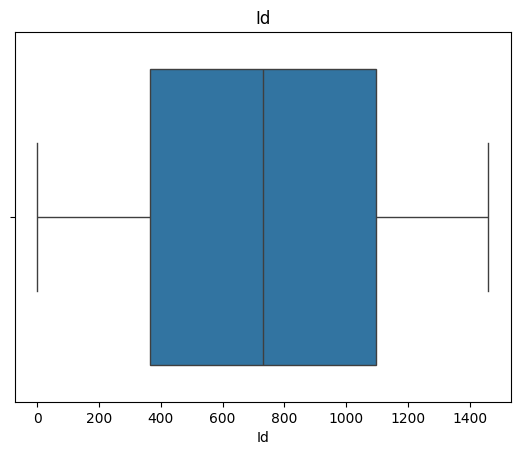

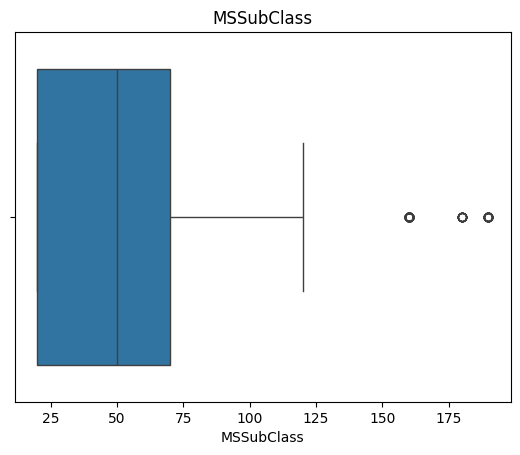

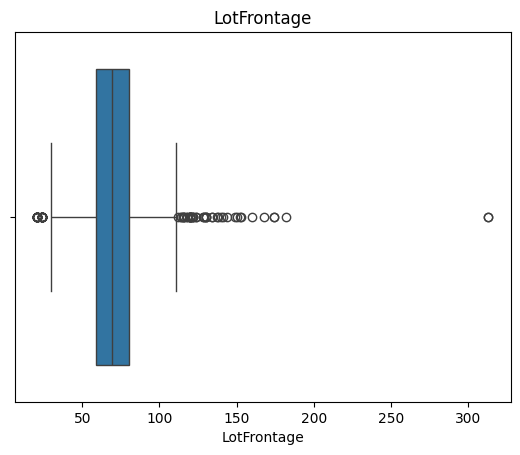

In [12]:
for col in num_cols[:3]:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


Id
What the boxplot shows
Evenly spread values
No meaningful outliers (because it’s just a sequence)
Interpretation:
Id is not a feature — it’s an identifier.
Action:
DROP IT
df.drop(columns=["Id"], inplace=True)
This is non-negotiable in ML.

MSSubClass
What the boxplot shows
Many distinct spikes
Values like 20, 30, 50, 60, 70, 120, etc.
Appears “outlier-heavy” in boxplot
 Interpretation (VERY IMPORTANT):
Although it’s numeric, MSSubClass is categorical:
Codes for building types
Distances between numbers have no numeric meaning
Boxplot outliers here are fake.
 Action:
Do NOT treat as numeric
Convert to categorical
df["MSSubClass"] = df["MSSubClass"].astype("object")
Then handle it with categorical encoding later.

LotFrontage
What the boxplot shows
Right-skewed
Several high-end outliers (very wide lots)
Interpretation:
This is a true numeric feature with:
Natural variation
Real outliers
Missing values (~17%)
These outliers are legitimate properties, not errors.
Action:
Keep feature
Impute missing values with median
Optional: cap extreme values (later)
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
Optional (robust model only):
df["LotFrontage"] = df["LotFrontage"].clip(
    upper=df["LotFrontage"].quantile(0.99)
)
